In [ ]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

file_download = drive.CreateFile({'id':'1Yf8pIkoJ0XG-Wz9T46wYRVobRhbOUtq8'})

file_download.GetContentFile('kc_house_data.csv')

# **1) Exploring dataset**

In [3]:
!pip install pandas-profiling

In [4]:
!pip install plotly==5.13.0

In [29]:
import pandas as pd
import pandas_profiling as pp
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from scipy.stats import pearsonr # we will use to select feations based on they relationship with target

In [6]:
df = pd.read_csv('kc_house_data.csv')

## 1.1 -  Data preprocessing

In [7]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df['date'] = df['date'].str.replace('T000000', '')

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [11]:
df.insert(1, 'day', df['date'].dt.day)
df.insert(2, 'month', df['date'].dt.month)
df.insert(3, 'year', df['date'].dt.year)

In [12]:
df.drop('date', axis=1, inplace=True)

In [13]:
df

,id,day,month,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,13,10,2014,221900.0,3,1.00,1180,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,9,12,2014,538000.0,3,2.25,2570,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,25,2,2015,180000.0,2,1.00,770,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,9,12,2014,604000.0,4,3.00,1960,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,18,2,2015,510000.0,3,2.00,1680,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,21,5,2014,360000.0,3,2.50,1530,1131,3.0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,23,2,2015,400000.0,4,2.50,2310,5813,2.0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,23,6,2014,402101.0,2,0.75,1020,1350,2.0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,16,1,2015,400000.0,3,2.50,1600,2388,2.0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
df.describe()

,id,day,month,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,15.688197,6.574423,2014.322954,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,8.635063,3.115308,0.467616,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,1.000000,1.000000,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,8.000000,4.000000,2014.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,16.000000,6.000000,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,23.000000,9.000000,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,31.000000,12.000000,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## 1.2 - Data visualization

In [16]:
features = [i for i in df.columns if i not in ['id', 'price']]
target = 'price'
print(features)

['day', 'month', 'year', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [17]:
date = pd.to_datetime(df[['day', 'month', 'year']], format='%d%m%Y')

In [18]:
fig = px.bar(x=date, y=df['price'])
fig.show()

feature :  bedrooms


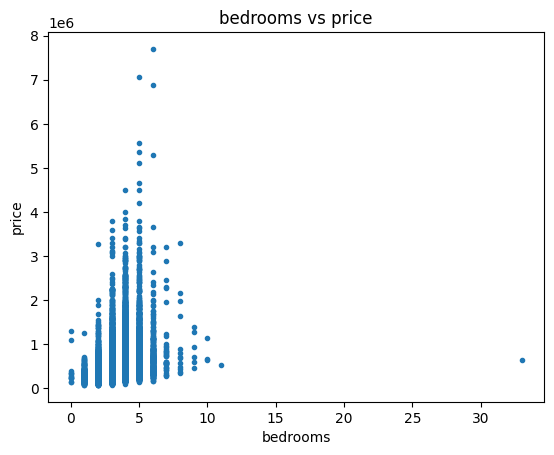

feature :  bathrooms


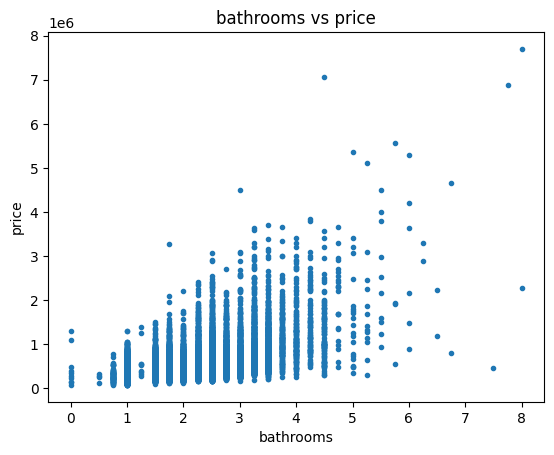

feature :  sqft_living


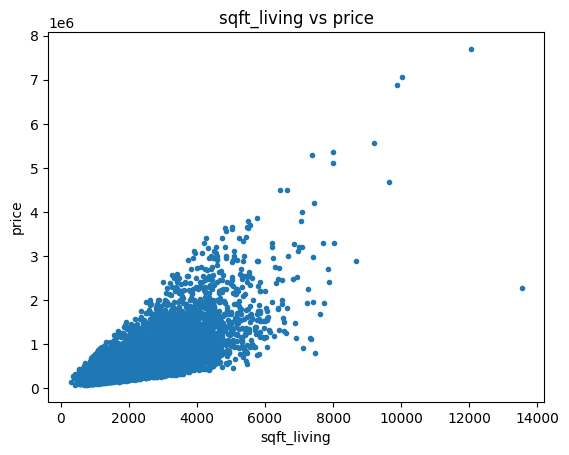

feature :  sqft_lot


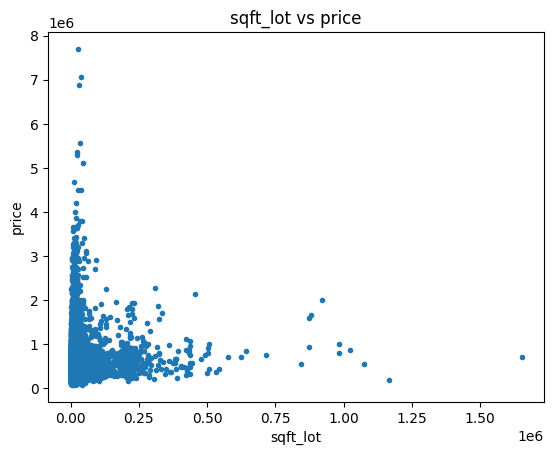

feature :  floors


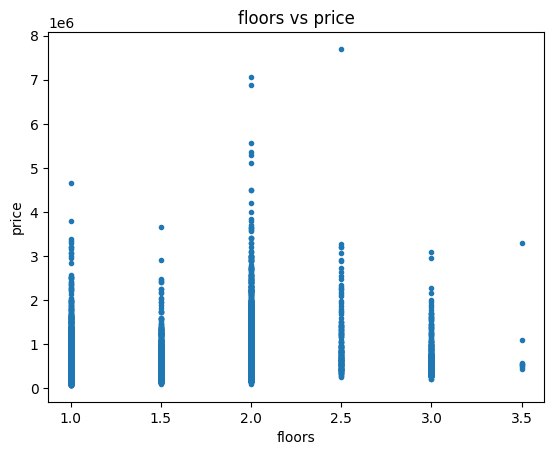

feature :  waterfront


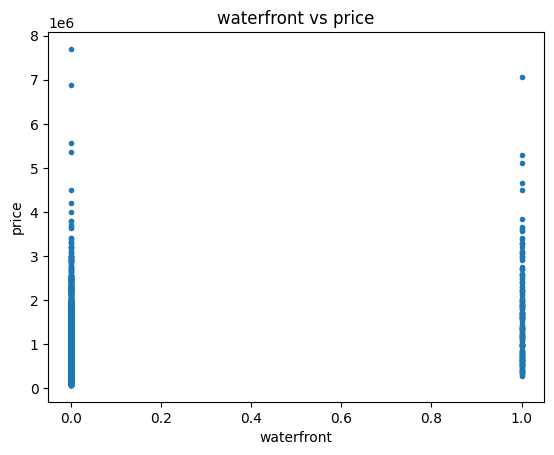

feature :  view


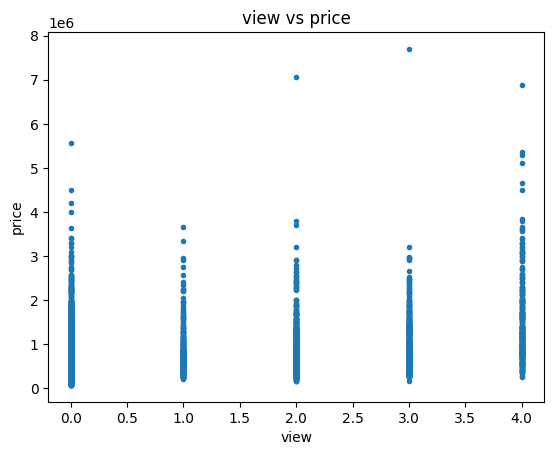

feature :  condition


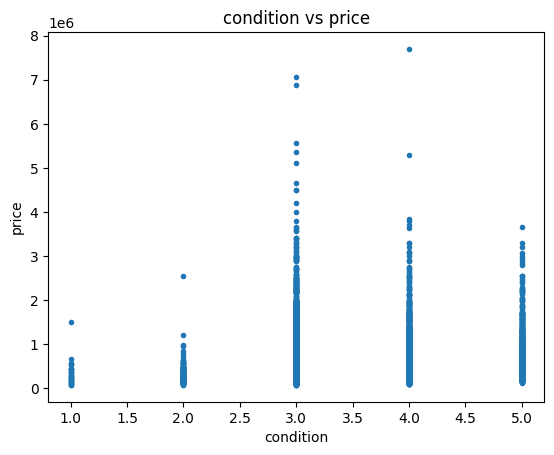

feature :  grade


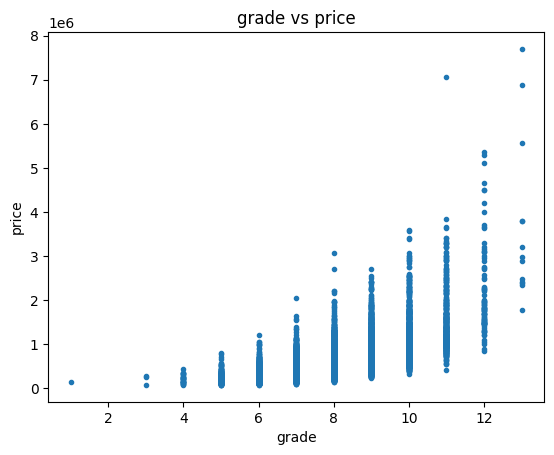

feature :  sqft_above


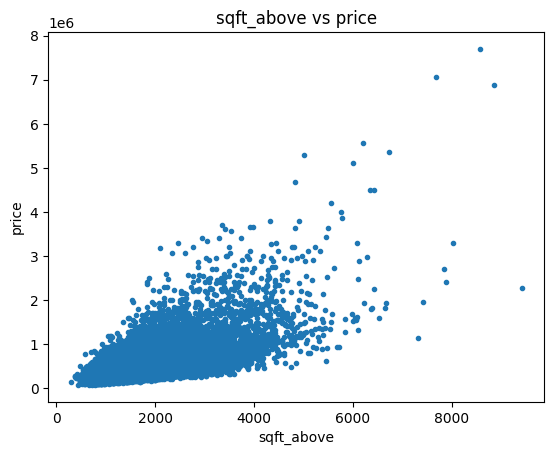

feature :  sqft_basement


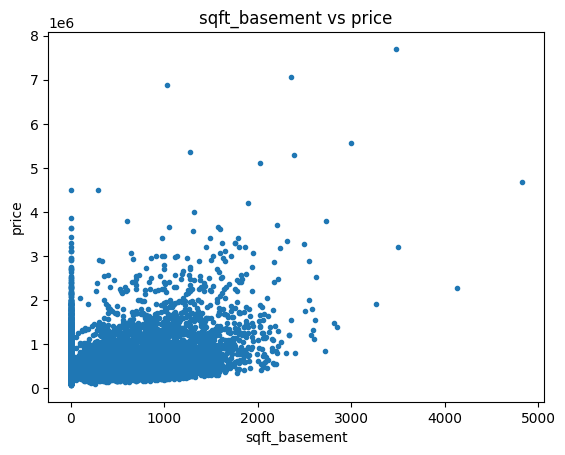

feature :  yr_built


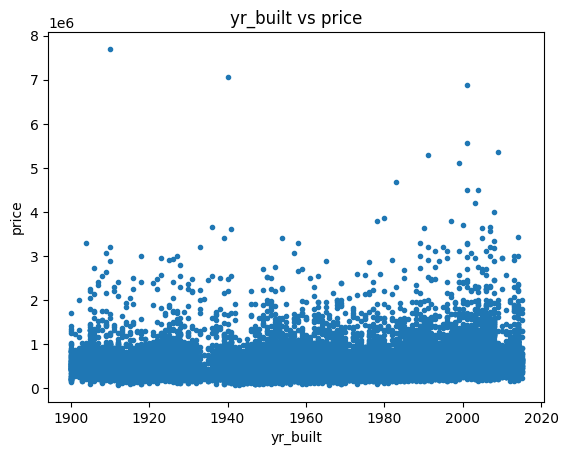

feature :  yr_renovated


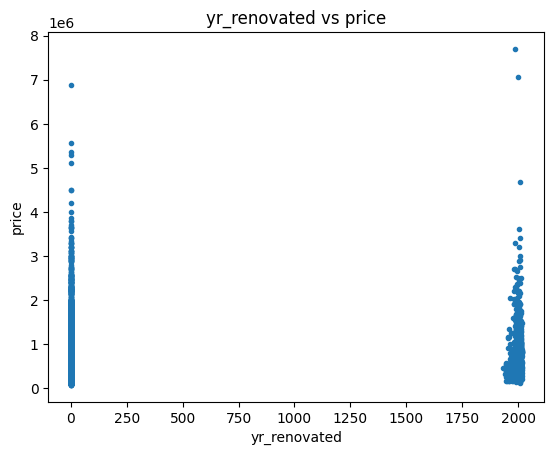

feature :  zipcode


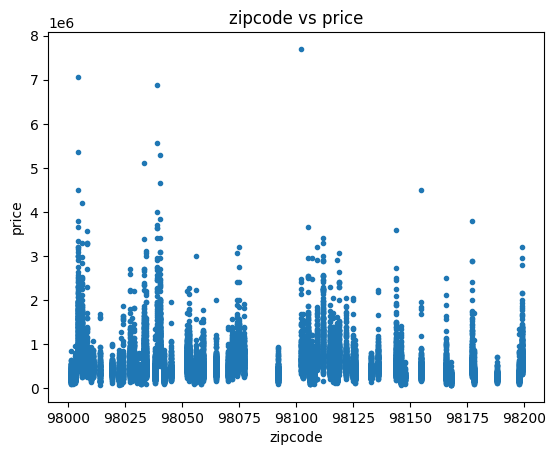

feature :  lat


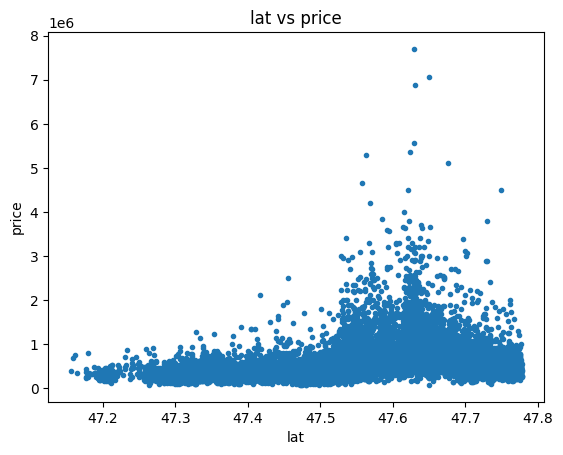

feature :  long


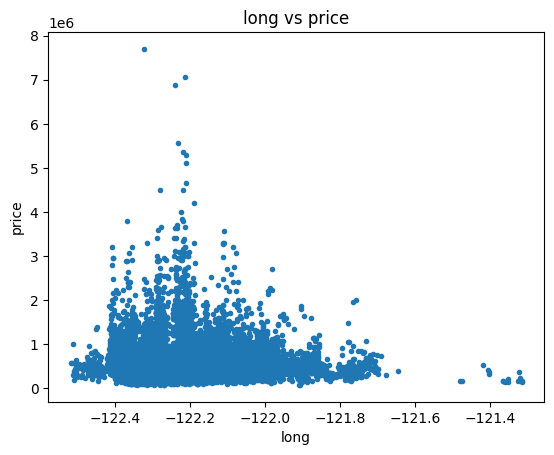

feature :  sqft_living15


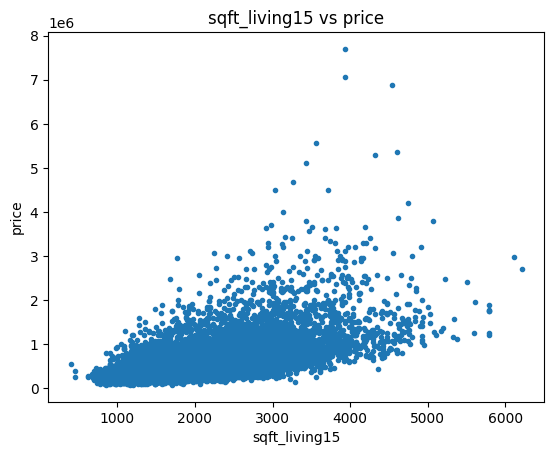

feature :  sqft_lot15


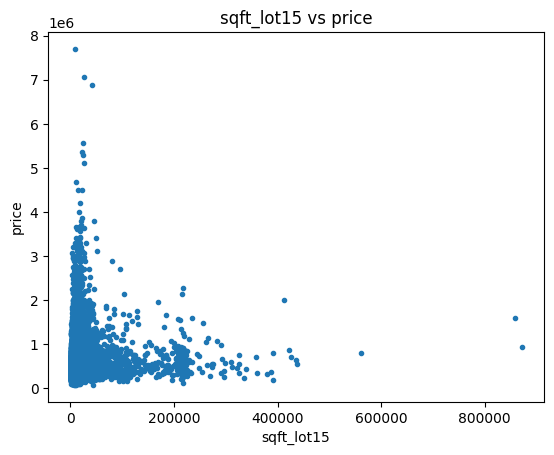

In [36]:
for feat in features[3:]:
  print('feature : ',feat)

  plt.plot(df[feat], df[target], '.')
  plt.xlabel(feat)
  plt.ylabel(target)
  plt.title(feat+' vs '+target)
  plt.show()


# **2) Select most important features**

Here we will select features that have good relationship with target by using pearson value on ***scipy*** library

In [21]:
p_values = []
p_coefs = []
for feat in features:
  p_coef, p_value = pearsonr(df[feat], df['price'])

  p_values.append(p_value)
  p_coefs.append(p_coef)
df_pearson = pd.DataFrame({'features':features, 'p values':p_values, 'p coefs':p_coefs})
df_pearson

,features,p values,p coefs
0,day,3.103041e-02,-0.014670
1,month,1.383487e-01,-0.010081
2,year,5.990981e-01,0.003576
3,bedrooms,0.000000e+00,0.308350
4,bathrooms,0.000000e+00,0.525138
5,sqft_living,0.000000e+00,0.702035
6,sqft_lot,7.972505e-40,0.089661
7,floors,1.581010e-322,0.256794
8,waterfront,0.000000e+00,0.266369
9,view,0.000000e+00,0.397293


we will select the feature that have pearson value (p value) less than 0.001

In [22]:
df_pearson[df_pearson['p values']<0.001]

,features,p values,p coefs
3,bedrooms,0.000000e+00,0.308350
4,bathrooms,0.000000e+00,0.525138
5,sqft_living,0.000000e+00,0.702035
6,sqft_lot,7.972505e-40,0.089661
7,floors,1.581010e-322,0.256794
8,waterfront,0.000000e+00,0.266369
9,view,0.000000e+00,0.397293
10,condition,8.935654e-08,0.036362
11,grade,0.000000e+00,0.667434
12,sqft_above,0.000000e+00,0.605567


In [23]:
good_features = df_pearson[df_pearson['p values']<0.001]['features'].values
good_features

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15'], dtype=object)

# **3) Split the data into training and testing set**

We split 70% to train set and 30% to test set
we will use features selecting that are in '***good_features***' variable

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[good_features], df[target], test_size=0.3, random_state=23)

# **4) Linear regression**
to apply linear regression, we choose the feature that have the best relationship with target

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [27]:
model = LinearRegression()
model.fit(x_train[['sqft_living']], y_train)

LinearRegression()

# **5) Plot linear regression**

We will extract the coefficient of the linear regression (w and b)
for the equation f(x) = y = w.x + b

In [38]:
from IPython.core.display import HTML, display

In [28]:
w = model.coef_
b = model.intercept_

In [44]:
f_x = np.dot(x_train[['sqft_living']], w) + b
trace = go.Scatter(x=x_train['sqft_living'], y=y_train, mode='markers')
trace2 = go.Scatter(x=x_train['sqft_living'], y=f_x)
data = [trace, trace2]
layout = go.Layout(title='sqft_living vs price', xaxis=dict(title='sqft_living'), yaxis=dict(title='price'))
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)
display(HTML('temp-plot.html'))

Output hidden; open in https://colab.research.google.com to view.

# **6) Performance of linear regression using the testing set**

In [31]:
from sklearn.metrics import *

In [32]:
y_pred = model.predict(x_test[['sqft_living']])
score = r2_score(y_pred, y_test)
score

0.05456871528547946

▶ ▶ **THE SCORE OF LINEAR REGRESSION IS 0.05456871528547946**



# **7) Apply multi-linear regression and compare it with linear regression**

For multi-linear regression we will use all features that are in ***'good_features'*** variable

In [33]:
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [34]:
score2 = r2_score(y_pred2, y_test)
score2

0.5951972140358803

▶ ▶ **THE SCORE OF MULTI-LINEAR REGRESSION IS 0.5951972140358803**

## **Conclusion**

We found out that the score of multi-linear regression is better than linear regression (0.054568 > 0.59519)
So the best model is multi-linear regression